# MBAN 6400 Group Project(Part B)

In [48]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [50]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy.cluster.vq import whiten,vq,kmeans
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import umap.umap_ as umap
import plotly.express as px
from scipy.stats import pearsonr


In [51]:
# K-means for Clustering
from sklearn.cluster import KMeans

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# cluster metrics

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [52]:
# drop discrete variables
data1 = pd.read_csv('new_data.csv')
data = data1.drop(columns = ['Unnamed: 0','PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'])

In [53]:
data1.columns

Index(['Unnamed: 0', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'ONEOFFPURCHASES_TOTAL', 'TOTAL_OWED', 'PCT_PAID',
       'PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'],
      dtype='object')

In [54]:
corr=data.corr()
corr.to_csv('corr.csv')

## PCA

### explain 80% variance

#### After comparing 80% and 90% variance we decided to used 80% because the 80% has filter 3 components with variance of 92% (Why? Because the 3rd componets explains more than 10%)

In [55]:
pca = PCA(n_components=0.8, random_state=42)
pca.fit(data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(data), columns=PC_names)

In [56]:
pca_data.head()

,PC1,PC2,PC3
0,-0.466073,-0.112939,0.044726
1,-0.634076,-0.009619,-0.154795
2,0.336514,0.904828,0.167287
3,-0.577134,-0.010757,0.176604
4,-0.541545,0.026664,-0.110541


In [57]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp.to_csv('pca_component_value.csv')

In [58]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'ONEOFFPURCHASES_TOTAL',
       'TOTAL_OWED', 'PCT_PAID'],
      dtype='object')

#### the first compononent explains 59.9% variance, the second explains 17.5%, the third explains 10.4%

In [59]:
pca.explained_variance_ratio_

array([0.59875215, 0.17503195, 0.10430809])

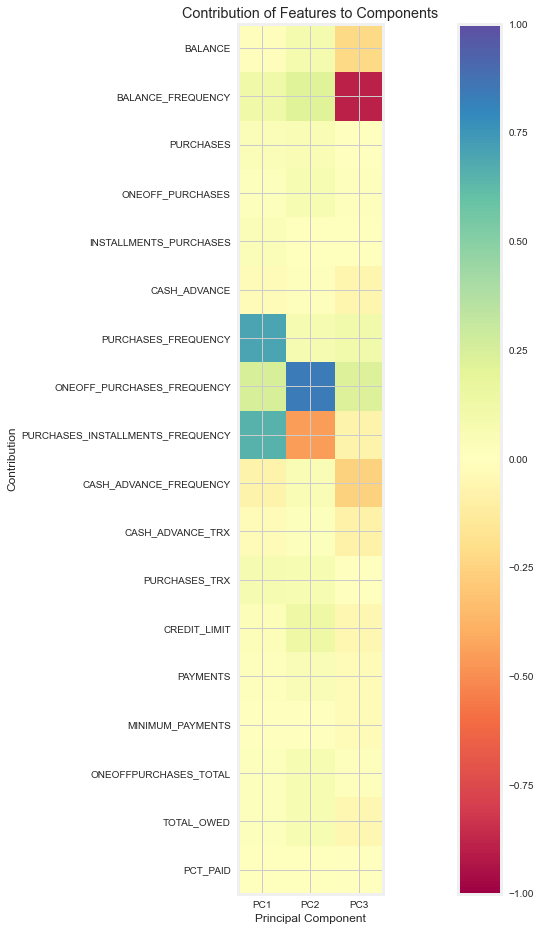

In [60]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()
plt.savefig('contribution.png')

In [61]:
pca_data.head()

,PC1,PC2,PC3
0,-0.466073,-0.112939,0.044726
1,-0.634076,-0.009619,-0.154795
2,0.336514,0.904828,0.167287
3,-0.577134,-0.010757,0.176604
4,-0.541545,0.026664,-0.110541


### KMeans - Elbow Method

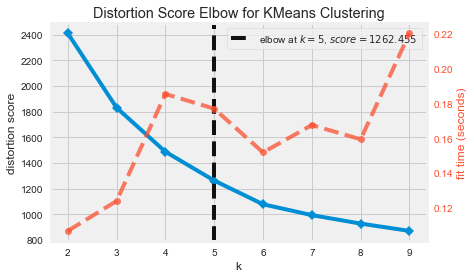

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(data)       
distortion_visualizer.show()      

#### The Elbow method tells us to use 5 clusters

In [63]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [64]:
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [65]:
data_cluster= data.copy()
data_cluster['Segment'] = kmeans.labels_

In [66]:
data_cluster.Segment.value_counts()

0    3310
1    2571
2    1229
4     980
3     860
Name: Segment, dtype: int64

In [67]:
segm_analysis = data_cluster.groupby(['Segment']).mean()
segm_analysis.to_csv('variable_mean_by_cluster.csv')

### KMeans - Silhouette Method

#### The Sihouette method also supports the choice of 5 cluster

Parameter: {'n_clusters': 2} Score 0.44856777958483746
Parameter: {'n_clusters': 3} Score 0.4441495025114853
Parameter: {'n_clusters': 4} Score 0.3907481253815368
Parameter: {'n_clusters': 5} Score 0.39464441644194437
Parameter: {'n_clusters': 6} Score 0.39185548416212557
Parameter: {'n_clusters': 7} Score 0.36503198929815966
Parameter: {'n_clusters': 8} Score 0.33407190540283166
Parameter: {'n_clusters': 9} Score 0.3381341157642636


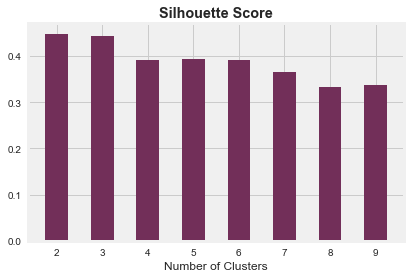

In [68]:
# candidate values for our number of cluster
parameters = [2,3, 4, 5,6,7,8,9]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.44856777958483746
For n_clusters = 3 The average silhouette_score is : 0.444109912192546
For n_clusters = 4 The average silhouette_score is : 0.3907488782060436
For n_clusters = 5 The average silhouette_score is : 0.3946774460238202
For n_clusters = 6 The average silhouette_score is : 0.3918312303136574


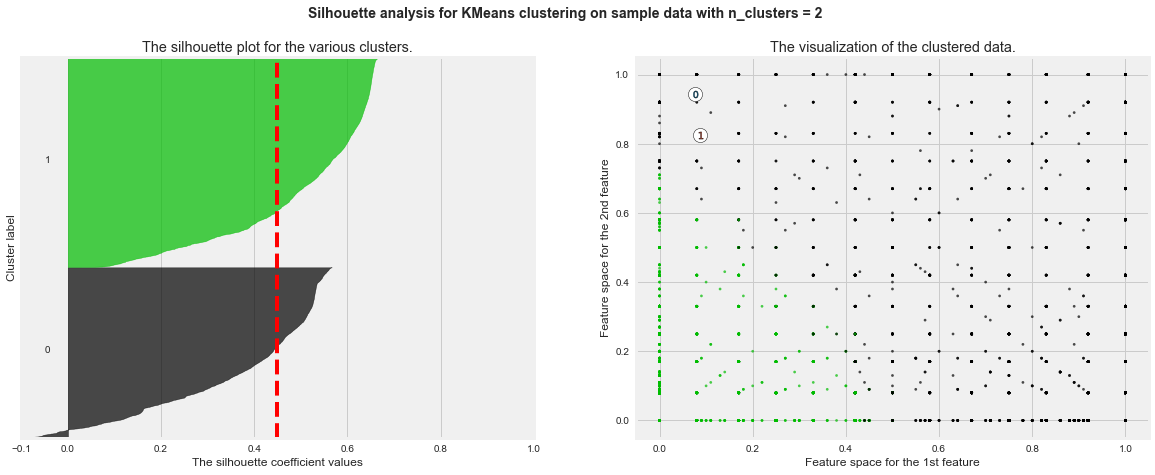

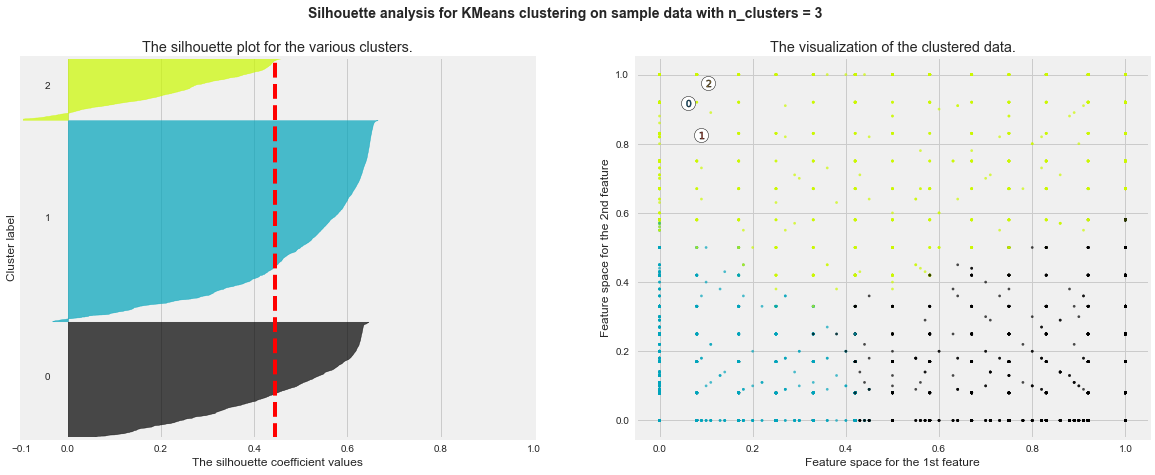

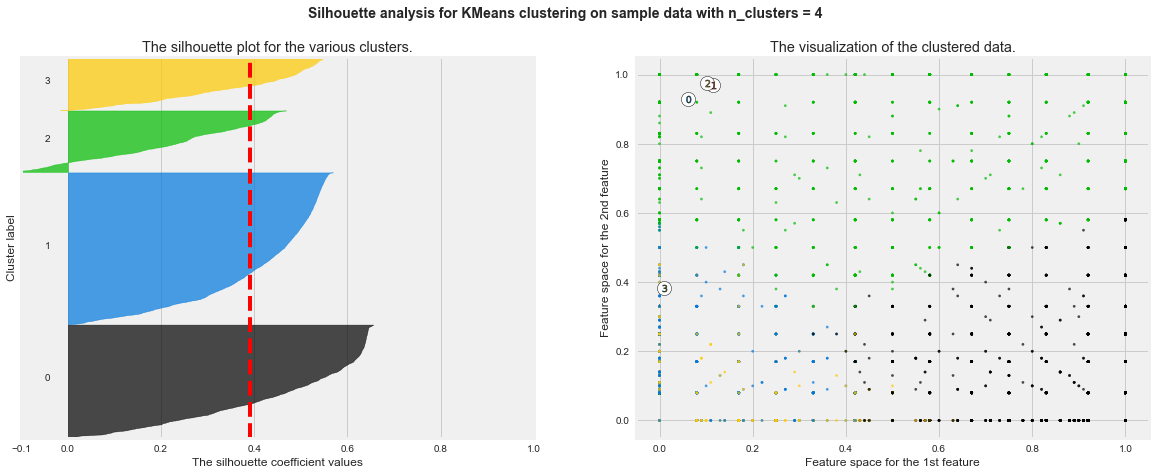

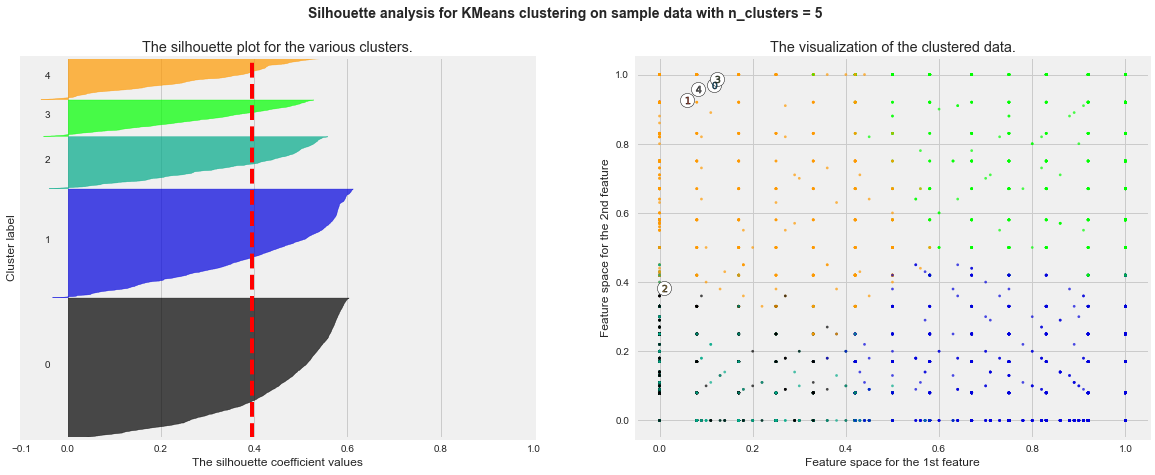

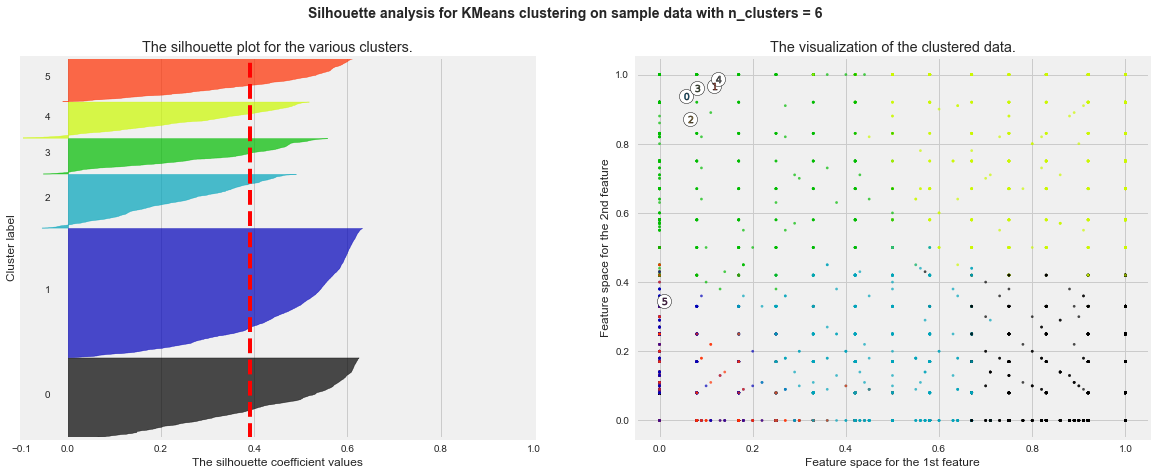

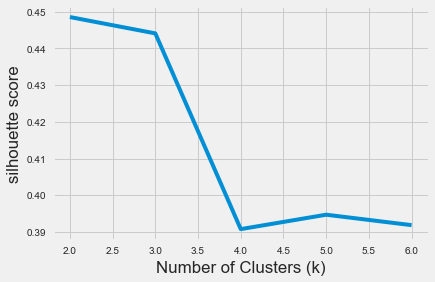

In [69]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style


range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data['PURCHASES_INSTALLMENTS_FREQUENCY'], data['ONEOFF_PURCHASES_FREQUENCY'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### The first principal component analysis
The first principal component is strongly correlated with four of the original variables. The first principal component increases with increasing INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and PURCHASES_TRX. 

This suggests that these four criteria vary together. If one increases, then the remaining ones tend to increase as well.

Furthermore, we see that the first principal component correlates most strongly with the PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. 

In fact, we could state that based on the correlation of PURCHASES_FREQUENCY(0.982), as from Part A of the project, both variables are highly correlated.

### The seconnd principal component analysis
The first principal component is strongly correlated with 1 of the original variables ONEOFF_PURCHASES_FREQUENCY.

### The third principal component analysis
The first principal component is negatively strongly correlated with 1 of the original variables. BALANCE_FREQUENCY.